# 📊 <span style="color: #7ec261;">Customer Churn Prediction Project</span>
### 📝 <span style="color: #7ec261;">Introducion</span>

In this project, I developed a predictive model to identify customers likely to churn in a telecommunications company, using a rich dataset of 7,043 customer records. The dataset includes a range of attributes, such as customer demographics (e.g., gender, senior citizen status), account information (e.g., tenure, contract type), and service utilization details (e.g., internet service, streaming options, tech support). My goal was to analyze key factors influencing customer retention and to accurately predict churn, allowing for proactive retention strategies. This project showcases my skills in data preprocessing, feature engineering, and machine learning model development.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv('churn.csv')

General information about the Dataframe

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dropping irrelevent columns with no predictive power (CustomerID)

In [54]:
df = df.drop('customerID' , axis=1)

# 🏷️ <span style="color: #7ec261;"> Label Encoding, changing categorical values into numerical format:</span>
- Identify Unique Values: Begin by printing the unique values in each categorical column to ensure a precise encoding plan.
- Convert to Binary: For binary categorical columns, map values directly to 0 and 1 where applicable.
- Encode Categorical Features: Apply label encoding to transform all necessary categorical columns into numerical format, ensuring each category is represented by either 0 or 1 for consistency.

In [55]:
for  col in df.columns:
    unique_values = {col : df[col].unique()}
    print(unique_values)

{'gender': array(['Female', 'Male'], dtype=object)}
{'SeniorCitizen': array([0, 1])}
{'Partner': array(['Yes', 'No'], dtype=object)}
{'Dependents': array(['No', 'Yes'], dtype=object)}
{'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])}
{'PhoneService': array(['No', 'Yes'], dtype=object)}
{'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object)}
{'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object)}
{'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)}
{'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object)}
{'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object)}
{'TechSupport': array(['No', 'Yes', 'No inte

In [56]:
df['gender'] = df['gender'].replace({
    'Male' : 1,
    'Female': 0
})
df['InternetService'] = df['InternetService'].replace({'DSL' : 1 ,
            'Fiber optic' : 1,
            'No' : 0
})

df['MultipleLines'] = df['MultipleLines'].replace({
    'No phone service': 0, 'No' : 0 , 'Yes' : 1
})

In [57]:
no_internet_service_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
replace_columns = ['Partner', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','Dependents']

In [58]:
for col in no_internet_service_columns:
    df[col] = df[col].replace({'No internet service' : 'No'})

In [59]:
df[replace_columns] = df[replace_columns].apply(lambda col: col.replace({'Yes':1,'No':0}))
    

In [60]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


# <span style="color: #7ec261;">One Hot Encoding :</span> 

One-hot encoding is essential to fully utilize the categorical features in our dataset, converting them into a numerical format that models can easily interpret.


- The get_dummies function in Pandas offers a quick and efficient way to apply one-hot encoding in Python.
After encoding, replace any False and True values with 0 and 1 to ensure consistency across the dataset.
This step ensures that each categorical feature contributes optimally to the model’s performance.

In [61]:
df = df.join(pd.get_dummies(df['Contract']))
df = df.join(pd.get_dummies(df['PaymentMethod']))
df.drop(['Contract','PaymentMethod'],axis=1 , inplace=True)

In [62]:
dummies_columns = ['Month-to-month','One year',	'Two year'	,'Bank transfer (automatic)',	'Credit card (automatic)',	'Electronic check',	'Mailed check']

for col in dummies_columns:
    df[col] = df[col].replace({False : 0 , True : 1 })

   Here I noticed some of the total charges values are empty, so we simply drop those 11 rows, compared to the total number of rows in the dataset, dropping them wil not affect the model training and prediction phase

In [63]:
df[df.TotalCharges.str.contains(' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
488,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,52.55,,0,0,0,1,1,0,0,0
753,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,20.25,,0,0,0,1,0,0,0,1
936,0,0,1,1,0,1,0,1,1,1,1,0,1,1,0,80.85,,0,0,0,1,0,0,0,1
1082,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,25.75,,0,0,0,1,0,0,0,1
1340,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,56.05,,0,0,0,1,0,1,0,0
3331,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,19.85,,0,0,0,1,0,0,0,1
3826,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,25.35,,0,0,0,1,0,0,0,1
4380,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,20.00,,0,0,0,1,0,0,0,1
5218,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,19.70,,0,0,1,0,0,0,0,1
6670,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,73.35,,0,0,0,1,0,0,0,1


In [64]:
df.drop(df.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]],inplace=True)

# <span style="color: #7ec261;">Feature Selection : </span>

To determine the most relevant features for model training, I employed three distinct feature selection methods:

📈 Pearson's Correlation Coefficient : Evaluates the linear relationship between numerical features and the target variable.



🧪 Chi-Squared (chi²) Test : Applies to categorical features only, measuring the independence between categorical variables and the target.



 📊 Mutual Information : Assesses both numerical and categorical features, estimating the dependency of each feature on the target variable.
By combining these methods, I obtained a clear understanding of which features to retain for optimal model performance, aiming to maximize predictive accuracy and efficiency.


## 1- Pearson's correlation coefficient

In [65]:
df.corr()['Churn']

gender                      -0.008545
SeniorCitizen                0.150541
Partner                     -0.149982
Dependents                  -0.163128
tenure                      -0.354049
PhoneService                 0.011691
MultipleLines                0.040033
InternetService              0.227578
OnlineSecurity              -0.171270
OnlineBackup                -0.082307
DeviceProtection            -0.066193
TechSupport                 -0.164716
StreamingTV                  0.063254
StreamingMovies              0.060860
PaperlessBilling             0.191454
MonthlyCharges               0.192858
TotalCharges                -0.199484
Churn                        1.000000
Month-to-month               0.404565
One year                    -0.178225
Two year                    -0.301552
Bank transfer (automatic)   -0.118136
Credit card (automatic)     -0.134687
Electronic check             0.301455
Mailed check                -0.090773
Name: Churn, dtype: float64

## 2- Chi2 Test

In [66]:
categorical_df = df.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
X_categorical = categorical_df.drop('Churn',axis=1)
y_categorical = categorical_df['Churn']

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi2_ = SelectKBest(chi2,k=8)
X_Kbest = chi2_.fit_transform(X_categorical,y_categorical)
selected_features = X_categorical.columns[chi2_.get_support()]
selected_features

Index(['SeniorCitizen', 'Dependents', 'OnlineSecurity', 'TechSupport',
       'Month-to-month', 'One year', 'Two year', 'Electronic check'],
      dtype='object')

## 3- Mutual Information 

 After performing this method, it gives us  a good idea on what features to drop.

In [67]:
X_mutualinfo = df.drop('Churn', axis=1)
y_mutualinfo = df['Churn']

In [68]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_mutualinfo,y_mutualinfo)
feature_scores = pd.Series(mutual_info , index = X_mutualinfo.columns).sort_values(ascending=False)

feature_scores

Month-to-month               0.092108
tenure                       0.074908
Two year                     0.062428
Electronic check             0.051138
MonthlyCharges               0.046294
TotalCharges                 0.044346
InternetService              0.025862
OnlineSecurity               0.024352
SeniorCitizen                0.022329
TechSupport                  0.019607
One year                     0.013259
Dependents                   0.012536
OnlineBackup                 0.012126
Partner                      0.010913
Credit card (automatic)      0.010048
PaperlessBilling             0.009323
Bank transfer (automatic)    0.005876
Mailed check                 0.004116
gender                       0.002296
MultipleLines                0.002063
PhoneService                 0.000000
StreamingTV                  0.000000
DeviceProtection             0.000000
StreamingMovies              0.000000
dtype: float64

In [69]:
final_df = df[feature_scores.index[0:12]]
final_df = final_df.join(df['Churn'])
final_df.head(2)


,Month-to-month,tenure,Two year,Electronic check,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,SeniorCitizen,TechSupport,One year,Dependents,Churn
0,1,1,0,1,29.85,29.85,1,0,0,0,0,0,0
1,0,34,0,0,56.95,1889.5,1,1,0,0,1,0,0


 Final look at the correlations in our final dataframe with only relevant features

In [70]:
final_df.corr()['Churn']

Month-to-month      0.404565
tenure             -0.354049
Two year           -0.301552
Electronic check    0.301455
MonthlyCharges      0.192858
TotalCharges       -0.199484
InternetService     0.227578
OnlineSecurity     -0.171270
SeniorCitizen       0.150541
TechSupport        -0.164716
One year           -0.178225
Dependents         -0.163128
Churn               1.000000
Name: Churn, dtype: float64

# <span style="color: #7ec261;">Data Scaling :</span>


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

Data after cleaning and scaling phase : 

In [30]:
final_df.head(3)

,Month-to-month,tenure,Two year,Electronic check,TotalCharges,MonthlyCharges,InternetService,PaperlessBilling,Partner,TechSupport,One year,Dependents,Churn
0,1,-1.280248,0,1,-0.994194,-1.161694,1,1,1,0,0,0,0
1,0,0.064303,0,0,-0.173740,-0.260878,1,0,0,0,1,0,0
2,1,-1.239504,0,0,-0.959649,-0.363923,1,1,0,0,0,0,1


# ⚖️ <span style="color: #7ec261;">Solving target variable imbalance:</span>
Imbalanced target variables can negatively impact model performance, especially for the minority class—in this case, customers who have canceled the company's service.

1- Analyze the Imbalance

- The plot below illustrates the imbalance, with fewer instances of customers who have churned compared to those who have not.


2- Balancing with SMOTEEN

- To address this, we first split the data into features (X) and target (y).
We then apply the SMOTEEN algorithm, a hybrid approach combining SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors) to balance the classes effectively, boosting model performance.
This approach helps to create a more balanced dataset, improving the model's ability to correctly predict customer churn.

<Axes: xlabel='Churn', ylabel='count'>

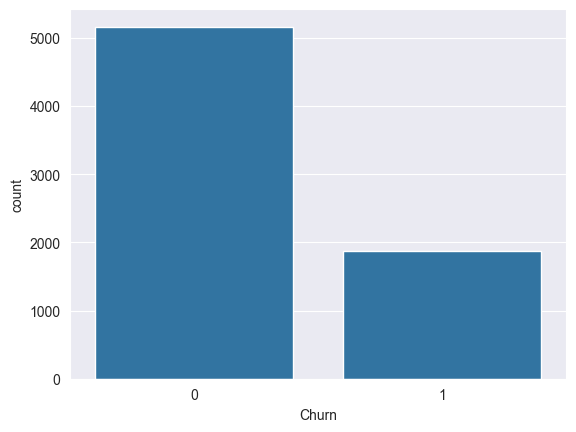

In [31]:
sns.countplot(x= df['Churn'])

In [32]:
X = final_df.drop('Churn',axis=1)
y = final_df['Churn']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state= 42)

In [33]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


X_resampled_train , X_resampled_test , y_resampled_train , y_resampled_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

Churn distribution after resampling the data, as we notice the data is quite balanced.

<Axes: xlabel='Churn'>

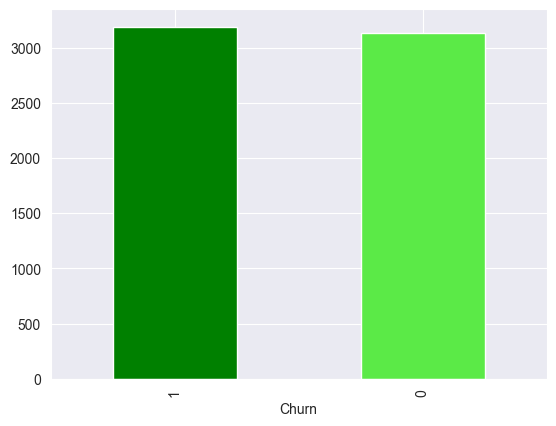

In [44]:
y_resampled.value_counts().plot(kind='bar', color =('g','#5bea47'))

# <span style="color: #7ec261;">Model Selection, Training and Evaluation :</span>


## 🧩 1- SUPPORT VECTOR CLASSIFIER

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score
from sklearn.metrics import classification_report

svc_model = SVC(kernel='rbf')
svc_model.fit(X_resampled_train,y_resampled_train)
svc_pred = svc_model.predict(X_resampled_test)

print(' SVC Accuracy score:', accuracy_score(y_resampled_test, svc_pred))
print(' SVC Precision score:', precision_score(y_resampled_test, svc_pred))
print(' SVC F1 score:', f1_score(y_resampled_test, svc_pred))
print(' SVC Recall score:', recall_score(y_resampled_test, svc_pred))

 SVC Accuracy score: 0.9074367088607594
 SVC Precision score: 0.9178515007898894
 SVC F1 score: 0.90852228303362
 SVC Recall score: 0.8993808049535603


## 🌳 2- RANDOM FOREST CLASSIFIER

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=10)

forest_model.fit(X_resampled_train,y_resampled_train)
forest_pred = forest_model.predict(X_resampled_test)

print(' RandomForest Accuracy score:', accuracy_score(y_resampled_test, forest_pred))
print(' RandomForest Precision score:', precision_score(y_resampled_test, forest_pred))
print(' RandomForest F1 score:', f1_score(y_resampled_test, forest_pred))
print(' RandomForest score:', recall_score(y_resampled_test, forest_pred))

 RandomForest Accuracy score: 0.9604430379746836
 RandomForest Precision score: 0.9641744548286605
 RandomForest F1 score: 0.9611801242236024
 RandomForest score: 0.958204334365325


## 🔗 3- NEURAL NETWORK

In [48]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [280]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [281]:
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_resampled_train, y_resampled_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.4151 - val_accuracy: 0.9156 - val_loss: 0.2299
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.2308 - val_accuracy: 0.9136 - val_loss: 0.2205
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2277 - val_accuracy: 0.9126 - val_loss: 0.2163
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9084 - loss: 0.2162 - val_accuracy: 0.9126 - val_loss: 0.2127
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2185 - val_accuracy: 0.9146 - val_loss: 0.2097
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9147 - loss: 0.1978 - val_accuracy: 0.9106 - val_loss: 0.2071
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.2055 - val_accuracy: 0.9096 - val_loss: 0.2033
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - loss: 0.1905 - val_accu

# 🏆 <span style="color: #7ec261;">Conclusion</span>

The customer churn prediction project successfully demonstrated the effectiveness of various machine learning models in identifying potential churners. The Support Vector Classifier achieved an accuracy of 90.74%, while the Random Forest classifier outperformed with an accuracy of 96.04%. A Neural Network model further improved the prediction performance, achieving a 96.7% training accuracy and 95.33% validation accuracy. These results highlight the potential for accurate churn prediction using machine learning, empowering businesses to make data-driven decisions for customer retention strategies.


                                                                                                            Work done by : Hamza Ikkou